In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

/home/sasidharreddy/.local/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/sasidharreddy/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df1 = pd.read_csv("/home/sasidharreddy/stuff/OELP_sem6/additional_features/data.csv")
df  =  df1
df.to_csv('new_output_file.csv', index=False)
df['datetime'] = pd.to_datetime( df['idates'].astype(str)+ '-' + df['imonths'].astype(str)+'-'+df['iyears'].astype(str))
df = df.drop(['idates', 'imonths', 'iyears'], axis=1)
df.to_csv('output_file.csv', index=False)

df = df.set_index('datetime')
df.index = pd.to_datetime(df.index)

In [3]:
df.head()

,obs,meanmod,stdmod,pvar1,pvar2,pvar3,pvar4,pvar5,pvar6,pvar7,...,pvar21,pvar22,pvar23,pvar24,pvar25,pvar26,pvar27,pvar28,pvar29,pvar30
datetime,,,,,,,,,,,,,,,,,,,,,
2007-01-06,0.0,0.0,0.0,291.720795,0.0,-0.782454,-0.490873,0.0,4.150000e-08,-8.050000e-06,...,287.904816,18.886101,15.760518,-1.342469,0.032635,-0.071185,0.044942,24.187777,3.949473,0.571053
2007-01-07,0.0,0.0,0.0,291.902191,0.0,-0.712374,-0.414769,0.0,-2.720000e-05,-3.050000e-06,...,286.894318,26.235052,16.276497,0.356517,0.068687,0.065599,-0.046934,10.856130,-3.764291,0.242903
2007-01-08,0.0,0.0,0.0,291.922394,0.0,-0.667299,0.080287,0.0,-7.300000e-06,1.560000e-05,...,286.598755,24.448057,9.800149,0.370943,0.010355,0.113501,-0.034104,0.199471,-6.309412,-0.131587
2007-01-09,0.0,0.0,0.0,292.204071,0.0,-0.481174,-0.055403,0.0,-4.310000e-05,1.630000e-07,...,287.291229,25.766298,8.085279,0.204268,0.057326,0.100468,0.003991,-3.734798,-2.256974,-0.494028
2007-01-10,0.0,0.0,0.0,292.935821,0.0,-0.396369,-0.392895,0.0,6.410000e-06,-1.220000e-05,...,288.210236,33.293129,12.673347,0.749107,0.062085,0.056777,-0.038684,-1.539389,-0.943537,-0.272203


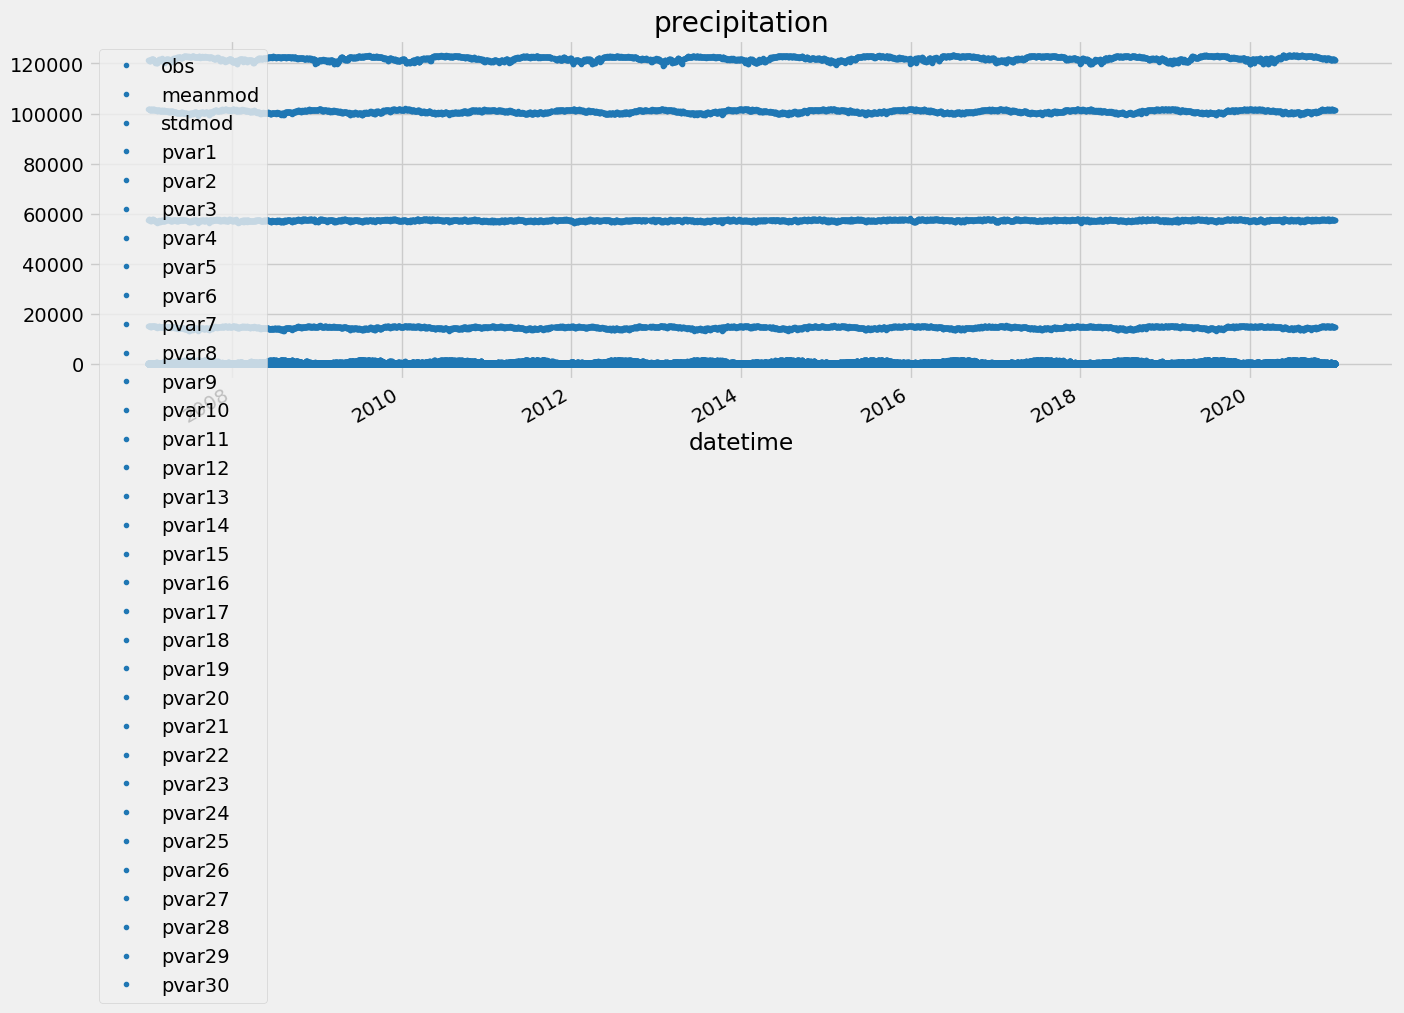

In [4]:
df.plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='precipitation')
plt.show()

<AxesSubplot:ylabel='Frequency'>

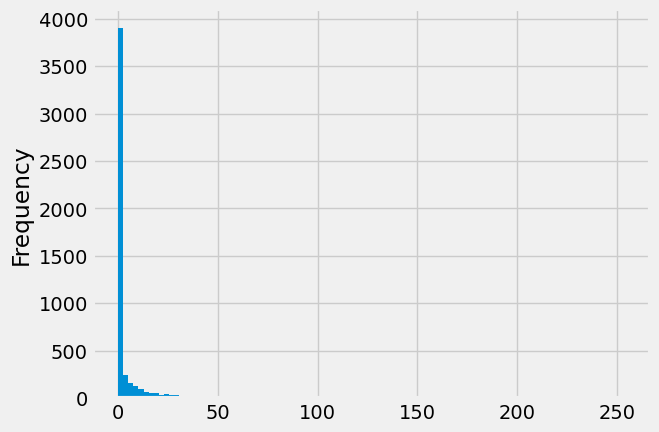

In [5]:
df['obs'].plot(kind='hist', bins=100)

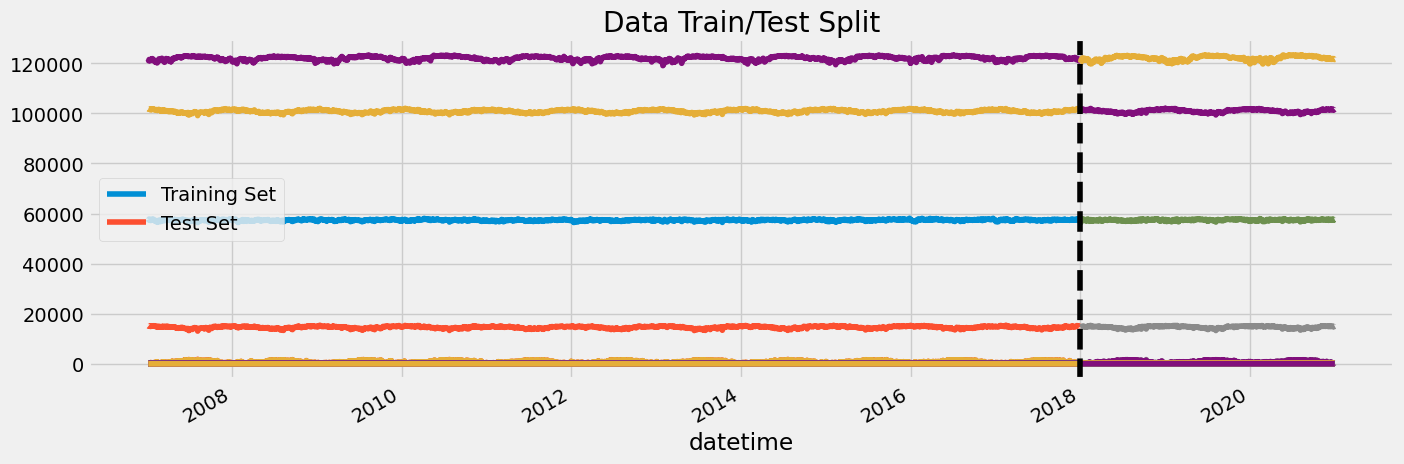

In [6]:
train = df.loc[df.index < '01-01-2018']
test = df.loc[df.index >= '01-01-2018']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('01-01-2018', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [7]:
from sklearn.model_selection import TimeSeriesSplit
#test size 1 day*365 days*1 year
tss = TimeSeriesSplit(n_splits=5, test_size=1*365*1, gap=1)
df = df.sort_index()


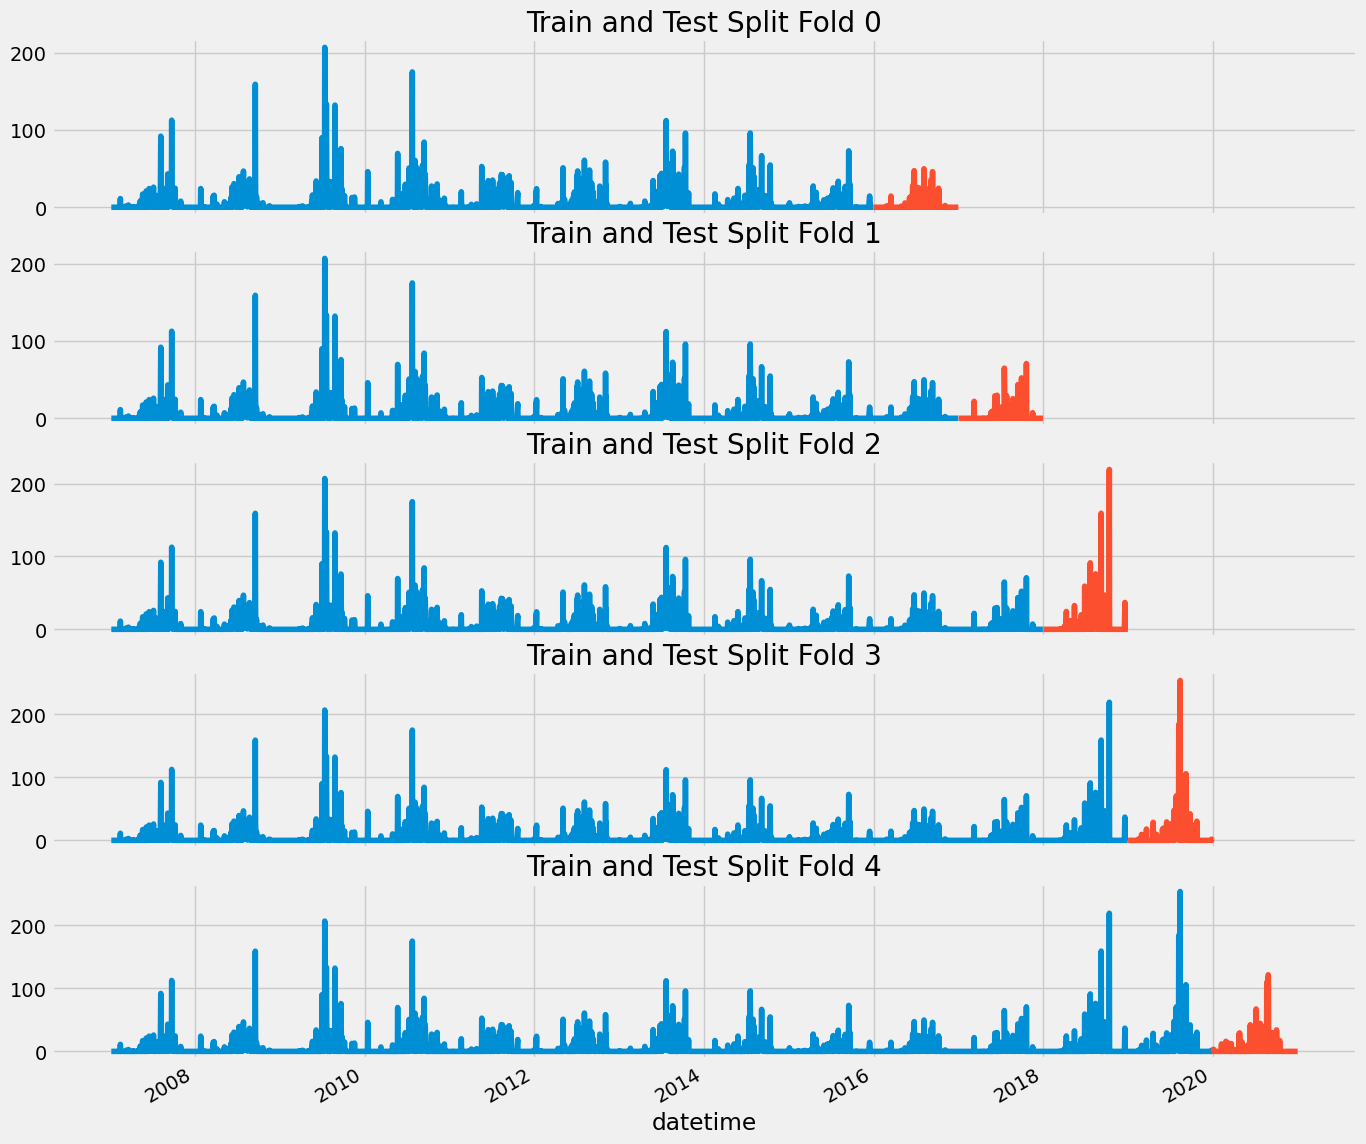

In [8]:
#time series cross validation
fig, axs = plt.subplots(5, 1, figsize=(15, 15), sharex=True)

fold = 0
for train_idx, val_idx in tss.split(df):
    train = df.iloc[train_idx]
    test = df.iloc[val_idx]
    train['obs'].plot(ax=axs[fold],
                          label='Training Set',
                          title=f'Train and Test Split Fold {fold}')
    test['obs'].plot(ax=axs[fold],
                         label='Test Set')
    #axs[fold].axvline(test.index.min(), color='black', ls='--')
    fold += 1
plt.show()

In [9]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

df = create_features(df)

In [10]:
df1['meanmod']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
4993    0.0
4994    0.0
4995    0.0
4996    0.0
4997    0.0
Name: meanmod, Length: 4998, dtype: float64

In [11]:
df['dayofmonth']

datetime
2007-01-06     6
2007-01-07     7
2007-01-08     8
2007-01-09     9
2007-01-10    10
              ..
2020-12-27    27
2020-12-28    28
2020-12-29    29
2020-12-30    30
2020-12-31    31
Name: dayofmonth, Length: 4998, dtype: int32

In [12]:
def add_lags(df):
    target_map = df['obs'].to_dict()
    df['lag1'] = (df.index - pd.Timedelta('364 days')).map(target_map)
    df['lag2'] = (df.index - pd.Timedelta('728 days')).map(target_map)
    df['lag3'] = (df.index - pd.Timedelta('1092 days')).map(target_map)
    return df

In [13]:
df = add_lags(df)

In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten, Dropout, BatchNormalization
from sklearn.metrics import mean_squared_error

# Assuming df is already loaded and sorted by date
df = df.sort_index()

def create_advanced_features(data):
    data['dayofyear'] = data.index.dayofyear
    data['dayofweek'] = data.index.dayofweek
    data['quarter'] = data.index.quarter
    data['month'] = data.index.month
    data['year'] = data.index.year
    data['month_year'] = data['month'] + data['year'] * 12

    data['rolling_mean_7'] = data['obs'].shift(1).rolling(window=7).mean()
    data['rolling_std_7'] = data['obs'].shift(1).rolling(window=7).std()

    for lag in [1, 2, 3, 7, 14, 21, 28]:
        data[f'lag{lag}'] = data['obs'].shift(lag)

    data.dropna(inplace=True)
    return data

df = create_advanced_features(df)

FEATURES = [
    'dayofyear', 'dayofweek', 'quarter', 'month', 'year', 'month_year',
    'rolling_mean_7', 'rolling_std_7', 'lag1', 'lag2', 'lag3', 'lag7', 'lag14', 'lag21', 'lag28'
]
for i in range(1, 31):
    FEATURES.append('pvar{}'.format(i))
TARGET = 'obs'

scaler = StandardScaler()
df_features = scaler.fit_transform(df[FEATURES])  # Scale features
df_features = df_features.reshape(-1, len(FEATURES), 1)  # Reshape for CNN

tss = TimeSeriesSplit(n_splits=5, test_size=365, gap=1)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
def build_model(input_shape):
    model = Sequential([
        LSTM(units=64, return_sequences=True, input_shape=input_shape),
        Dropout(0.5),
        BatchNormalization(),
        LSTM(units=32),
        Dropout(0.5),
        BatchNormalization(),
        Dense(50, activation='sigmoid'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

scores = []
for train_idx, val_idx in tss.split(df_features):
    X_train, X_test = df_features[train_idx], df_features[val_idx]
    y_train, y_test = df[TARGET].iloc[train_idx].values, df[TARGET].iloc[val_idx].values
    
    model = build_model((X_train.shape[1], 1))
    model.fit(X_train, y_train, epochs=10, verbose=0)

    y_pred = model.predict(X_test)
    score = np.sqrt(mean_squared_error(y_test, y_pred))
    scores.append(score)

print("Best RMSE per fold:", scores)
print("Average RMSE:", np.mean(scores))


2024-05-14 18:47:12.761038: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-14 18:47:12.800996: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-14 18:47:12.991412: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-14 18:47:12.991515: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-14 18:47:13.022709: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

12/12 [==============================] - 1s 11ms/step
Best RMSE per fold: [6.777542710713238, 7.866533901290277, 16.967697642476697, 18.66873533725228, 12.01814616929359]
Average RMSE: 12.459731152205217


In [15]:
scores

[6.777542710713238,
 7.866533901290277,
 16.967697642476697,
 18.66873533725228,
 12.01814616929359]

In [16]:
print(f'mean square error across folds {np.mean(scores):0.4f}')
print(f'Fold mean square error:{scores}')

mean square error across folds 12.4597
Fold mean square error:[6.777542710713238, 7.866533901290277, 16.967697642476697, 18.66873533725228, 12.01814616929359]


In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten, Dropout, BatchNormalization
from sklearn.metrics import mean_squared_error

# Assuming df is already loaded and sorted by date
df = df.sort_index()

def create_advanced_features(data):
    data['dayofyear'] = data.index.dayofyear
    data['dayofweek'] = data.index.dayofweek
    data['quarter'] = data.index.quarter
    data['month'] = data.index.month
    data['year'] = data.index.year
    data['month_year'] = data['month'] + data['year'] * 12

    data['rolling_mean_7'] = data['obs'].shift(1).rolling(window=7).mean()
    data['rolling_std_7'] = data['obs'].shift(1).rolling(window=7).std()

    for lag in [1, 2, 3, 7, 14, 21, 28]:
        data[f'lag{lag}'] = data['obs'].shift(lag)

    data.dropna(inplace=True)
    return data

df = create_advanced_features(df)

FEATURES = [
    'dayofyear', 'dayofweek', 'quarter', 'month', 'year', 'month_year',
    'rolling_mean_7', 'rolling_std_7', 'lag1', 'lag2', 'lag3', 'lag7', 'lag14', 'lag21', 'lag28'
]
for i in range(1, 31):
    FEATURES.append('pvar{}'.format(i))
TARGET = 'obs'

scaler = StandardScaler()
df_features = scaler.fit_transform(df[FEATURES])  # Scale features
df_features = df_features.reshape(-1, len(FEATURES), 1)  # Reshape for CNN

tss = TimeSeriesSplit(n_splits=5, test_size=365, gap=1)

def build_model(input_shape):
    model = Sequential([
        LSTM(units=64, return_sequences=True, input_shape=input_shape),
        Dropout(0.5),
        BatchNormalization(),
        LSTM(units=32),
        Dropout(0.5),
        BatchNormalization(),
        Dense(50, activation='sigmoid'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

scores = []
X_all = df_features
y_all = df[TARGET]
# Re-running the model with simplified parameters
model = build_model((X_train.shape[1], 1))
model.fit(X_all, y_all, epochs=100, verbose=0)

y_pred_all = model.predict(X_all)
rmse = np.sqrt(mean_squared_error(y_all, y_pred_all))
print(f"RMSE: {rmse}")

155/155 [==============================] - 2s 10ms/step
RMSE: 10.44392172072572


In [18]:
# import numpy as np
# from sklearn.preprocessing import MinMaxScaler
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Dropout

# # Assuming X_all is a numpy array containing your features and y_all is a numpy array containing your target

# # Convert y_all to a 2D array (necessary for MinMaxScaler)

# # Build LSTM model
# model = Sequential([
#     LSTM(units=64, input_shape=(X_all.shape[1], X_all.shape[2])),
#     Dropout(0.5),
#     Dense(50, activation='relu'),
#     Dense(1)
# ])

# model.compile(optimizer='adam', loss='mse')

# # Train LSTM model
# model.fit(X_all, y_all, epochs=100, batch_size=32, verbose=1)

# # After training, you can use the model to make predictions


In [19]:
# Add predicted values as a new column to the DataFrame
df['predicted_data'] = y_pred_all

In [20]:
# Replace negative predicted values with zero
df['predicted_data'] =df['predicted_data'].clip(lower=0)
df['predicted_data'] = df['predicted_data'].clip(lower=0).round(2)

In [21]:
y_all

datetime
2007-03-03    0.0
2007-03-04    0.0
2007-03-05    0.0
2007-03-06    0.0
2007-03-07    0.0
             ... 
2020-12-27    0.0
2020-12-28    0.0
2020-12-29    0.0
2020-12-30    0.0
2020-12-31    0.0
Name: obs, Length: 4942, dtype: float64

In [22]:
from sklearn.metrics import r2_score

# Calculate bias
bias = np.mean(df['predicted_data'] - y_all)

# Calculate standard deviation
std = np.std(df['predicted_data'] - y_all)

# Calculate mean
mean = np.mean(df['predicted_data'])

# Calculate R-squared
r2 = r2_score(y_all, df['predicted_data'])

print("Bias:", bias)
print("Standard Deviation:", std)
print("Mean:", mean)
print("R-squared:", r2)


Bias: -1.437211652950616
Standard Deviation: 10.344561822211302
Mean: 2.6402104
R-squared: 0.37119584255110005


In [23]:
from sklearn.metrics import mean_squared_error, r2_score

rmse_meanmod = np.sqrt(mean_squared_error(df['obs'], df['meanmod']))
r2_meanmod = r2_score(df['obs'], df['meanmod'])
bias_meanmod = np.mean(df['meanmod'] - df['obs'])
mean_meanmod = np.mean(df['meanmod'])

print("RMSE for meanmod:", rmse_meanmod)
print("R-squared for meanmod:", r2_meanmod)
print("Bias for meanmod:", bias_meanmod)
print("Mean for meanmod:", mean_meanmod)

mean_obs=np.mean(df['obs'])
print('obs mean',mean_obs)


RMSE for meanmod: 13.198939777516445
R-squared for meanmod: -0.004306193097375122
Bias for meanmod: 1.227235936867665
Mean for meanmod: 5.304658033184945
obs mean 4.07742209631728


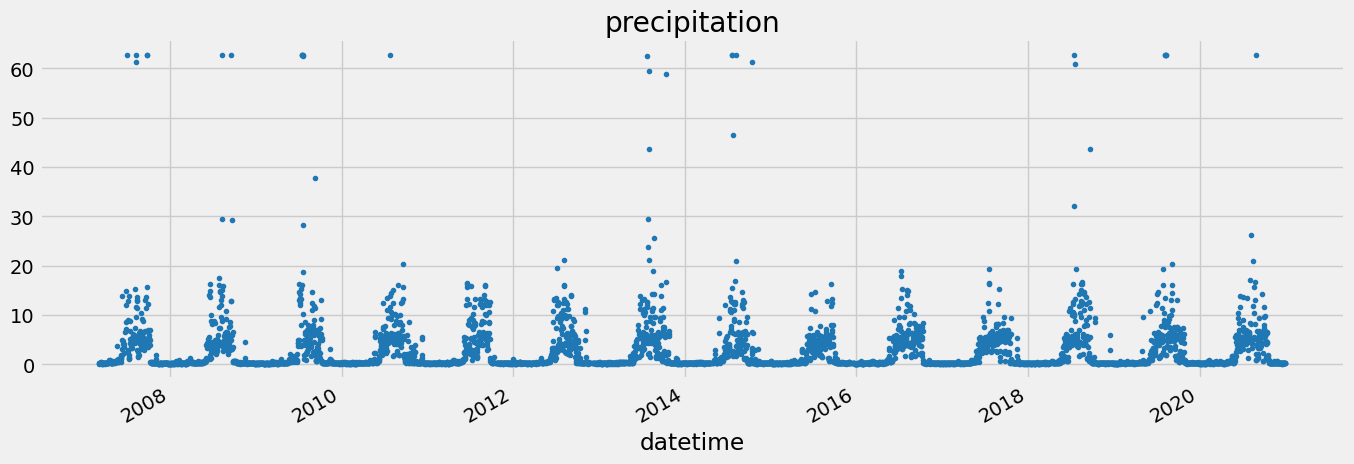

In [24]:
df['predicted_data'].plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='precipitation')
plt.show()

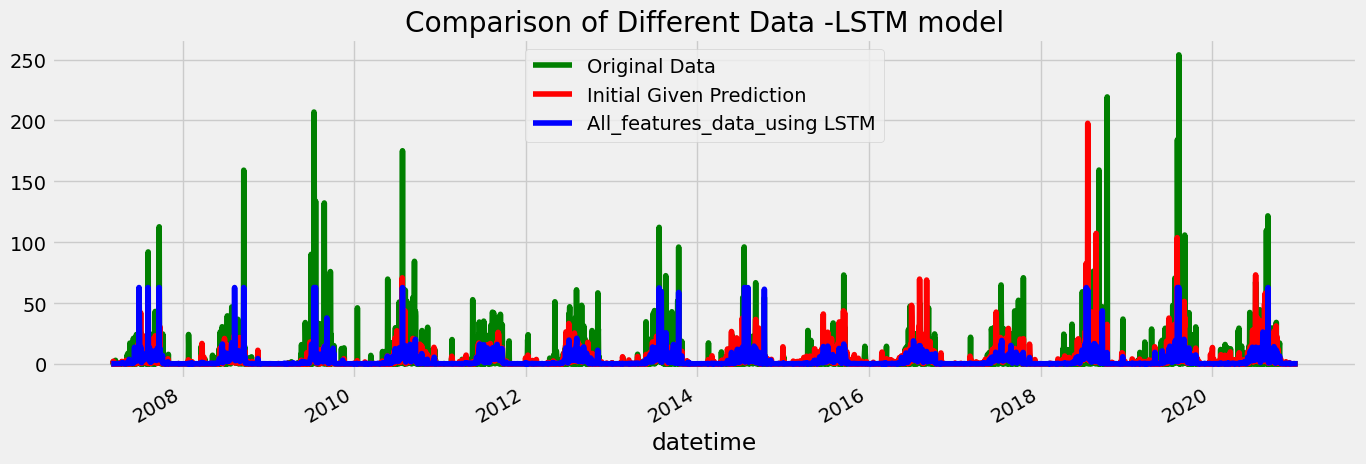

In [25]:
import matplotlib.pyplot as plt

# Plotting all the columns in a single plot
plt.figure(figsize=(15, 5))

# Plotting 'predicted_data' column

# Plotting 'obs' column
df['obs'].plot(style='-', color='green', label='Original Data')

# Plotting 'stdmod' column
df['stdmod'].plot(style='-', color='red', label='Initial Given Prediction')
df['predicted_data'].plot(style='-', color='blue', label='All_features_data_using LSTM')

# Adding title and legend
plt.title('Comparison of Different Data -LSTM model')
plt.legend()

# Display the plot
plt.show()


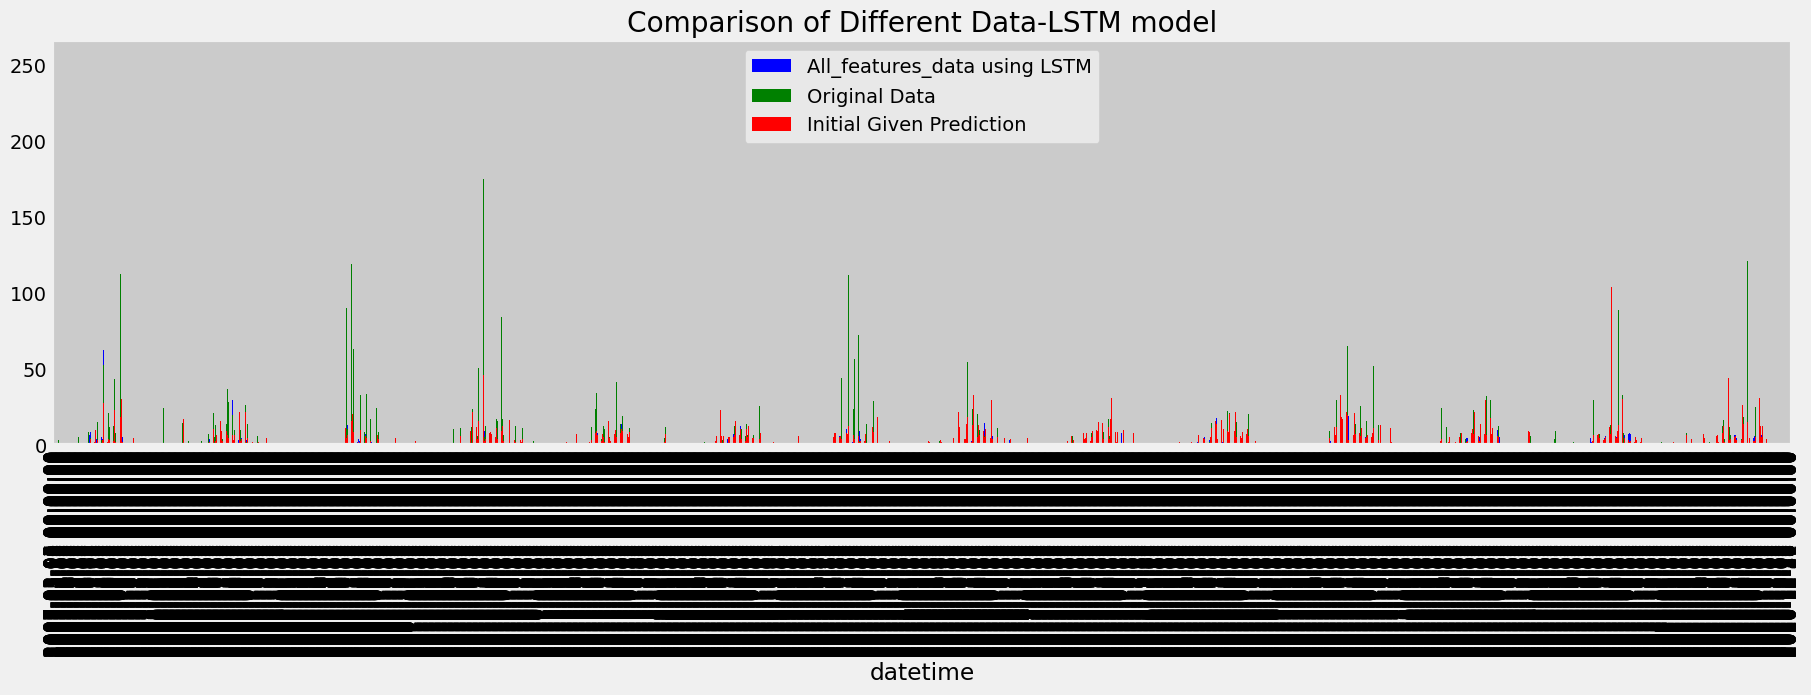

In [26]:
import matplotlib.pyplot as plt

# Plotting all the columns in a single plot
plt.figure(figsize=(20, 5))

# Plotting 'predicted_data' column
df['predicted_data'].plot(kind='bar', color='blue', label='All_features_data using LSTM')

# Plotting 'obs' column
df['obs'].plot(kind='bar', color='green', label='Original Data')

# Plotting 'stdmod' column
df['stdmod'].plot(kind='bar', color='red', label='Initial Given Prediction')

# Adding title and legend
plt.title('Comparison of Different Data-LSTM model')
plt.legend()

# Display the plot
plt.show()


<AxesSubplot:xlabel='datetime'>

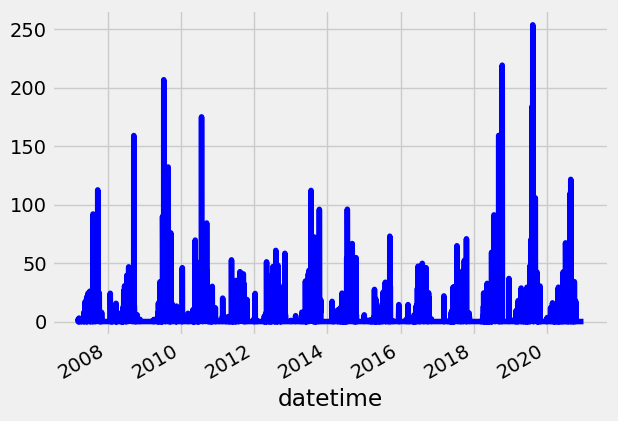

In [28]:
# Plotting 'obs' column
df['obs'].plot(style='-', color='blue', label='Original Data')